## An Overview of Scipy-Stats Python Library

Scipy-stats is the statistical Functions subpackage of the SciPy library.It consists of a large number of probability distribution and statistical functions.

Purpose  : 

1. Has functions for both Discrete and Continuous variables

2. Descriptive Statistical values - the values of observation in a variable

4. Different types of distributions such as :

        .  Uniform ( continous or discrete )-  distribution describes an experiment where there is an arbitrary outcome that lies between certain parameters or  "discrete uniform distribution" would be "a known, finite number of outcomes equally likely to happen".
       . Continuous - A probability distribution in which the random variable X can take on any value (is continuous)
       . Binomial -distribution type that has two possible outcomes e.g, a coin toss has only two possible outcomes: heads or   tails 

5. Perform T-tests on data to evaluate the difference between the mean (average) values of two arrays.


SciPy Stats consists of the following three generic base classes:


1. rv_continuous

 - construction of a specific distribution sub-classes and instances for continuous random variables. It can take any value

2. rv_discrete

 - construction of a specific distribution sub-classes and instances for discrete random variables.Example distribution of this would be bionmial 

3. rv_histogram
  - used  to generate specific distribution histograms. It can also be inherited from the class.



In [27]:
# Data frames.
import pandas as pd

# Plotting.
import seaborn as sns

# Stats.
import scipy.stats as ss

# Numerical arrays.
import numpy as np

# Collections.
import collections as co

# Specials.
import scipy.special as spec


# For plotting 
import plotly as py
import plotly.graph_objects as go
from plotly.offline import iplot
import plotly.express as px

## IMPORTING THE DATASET

https://www.sheffield.ac.uk/mash/statistics/datasets

This data set contains information on 78 people using one of three diets:

| Variable Name   	| Variable                        	| Data Type 	|
|-----------------	|---------------------------------	|-----------	|
| People          	| Particular Number               	|           	|
| Gender          	| 1= Male, 0 = Female             	| Binary    	|
| Age             	| Age ( years)                    	| Scale     	|
| Height          	| Height(cm)                      	| Scale     	|
| Preweight       	| Weight before the diet (kg)     	| Scale     	|
| Diet            	| Diet                            	| Binary    	|
| Weight 6 weeks 	| Weight after 6 weeks (kg)      	| Scale     	|



In [ ]:
Question : Which diet is best for losing weight ? /  Are there gender differences for weight lost ?


In [3]:
df = pd.read_csv(r'C:\Users\User\Desktop\repo\Machine-learning-and-Statistics\Scipy Stats\Diet_R.csv')
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,Weight loss
0,25,,41,171,60,2,60.0,0.0
1,26,,32,174,103,2,103.0,0.0
2,1,0,22,159,58,1,54.2,3.8
3,2,0,46,192,60,1,54.0,6.0
4,3,0,55,170,64,1,63.3,0.7
...,...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2,2.8
74,75,1,49,177,84,3,79.9,4.1
75,76,1,28,164,85,3,79.7,5.3
76,77,1,40,167,87,3,77.8,9.2


### Assumption 1: Dependent variable
**************************************

In [46]:
# The dependent variable.
dependent = df['Weight loss']
dependent

0     0.0
1     0.0
2     3.8
3     6.0
4     0.7
     ... 
73    2.8
74    4.1
75    5.3
76    9.2
77    6.1
Name: Weight loss, Length: 78, dtype: float64

In [13]:
dependent.describe()

count    78.000000
mean      2.038462
std       0.812920
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       3.000000
Name: Diet, dtype: float64

### Assumption 2: Independent variable
*************************************

In [45]:
# Independent variable.
independent = df['Diet']
independent

0     2
1     2
2     1
3     1
4     1
     ..
73    3
74    3
75    3
76    3
77    3
Name: Diet, Length: 78, dtype: int64

### Assumption 4: Outliers
*************************************************

<AxesSubplot:xlabel='Diet', ylabel='Weight loss'>

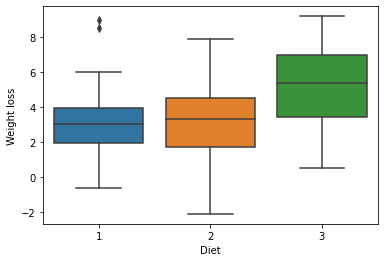

In [47]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(x=independent, y=dependent)

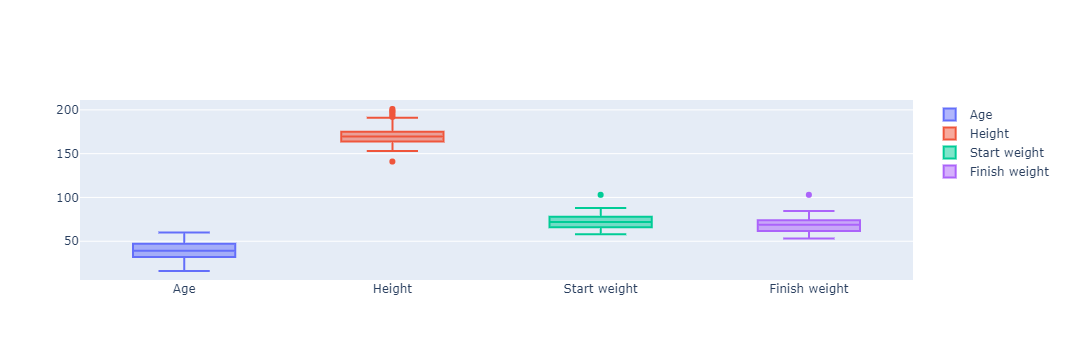

In [48]:
fig = go.Figure()

fig.add_trace(go.Box(y=df.Age.values, name = "Age"))
fig.add_trace(go.Box(y=df.Height.values, name = "Height"))
fig.add_trace(go.Box(y=df["pre.weight"].values, name = "Start weight"))
fig.add_trace(go.Box(y=df["weight6weeks"].values, name = "Finish weight"))

fig.show()

### Assumption 5: Normality
*******************************************

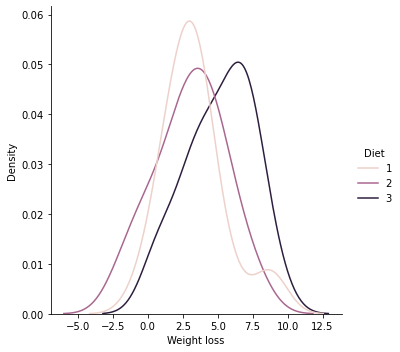

In [49]:
# KDEs of the three categories.
sns.displot(x=dependent, hue=independent, kind="kde")

In [54]:
# Extract the weight losses for diet 1.
Weightloss_1 = dependent[independent == 1]
Weightloss_1

2     3.8
3     6.0
4     0.7
5     2.9
6     2.8
7     2.0
8     2.0
9     8.5
10    1.9
11    3.1
12    1.5
13    3.0
14    3.6
15    0.9
45   -0.6
46    1.1
47    4.5
48    4.1
49    9.0
50    2.4
51    3.9
52    3.5
53    5.1
54    3.5
Name: Weight loss, dtype: float64

In [53]:
# Run the Shapiro-Wilk test.
ss.shapiro(dependent[independent == 1])

ShapiroResult(statistic=0.9255314469337463, pvalue=0.07748671621084213)

In [55]:
ss.shapiro(dependent[independent == 2])

ShapiroResult(statistic=0.9855913519859314, pvalue=0.961176335811615)

In [56]:
# Run the test for the virginica.
ss.shapiro(dependent[independent == 3])

ShapiroResult(statistic=0.9601252675056458, pvalue=0.37203603982925415)

### Assumption 6: Homogeneity of Variances
**************************************************

In [57]:
# Test for equal variances.
ss.levene(
    dependent[independent == 1],
    dependent[independent == 2],
    dependent[independent == 3]
)

LeveneResult(statistic=0.6256665777896286, pvalue=0.5376731304274011)

### One-way ANOVA
Even though assumption 6 (and possible 4) are looking bad, we'll go ahead for learning purposes.
*****************************************************************************************************

In [58]:
# ANOVA.
ss.f_oneway(
    dependent[independent == 1],
    dependent[independent == 2],
    dependent[independent == 3]
)

F_onewayResult(statistic=6.1974474531653545, pvalue=0.0032290142385893524)